In [325]:
import h5py
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision.transforms.v2 as T2

seed = 42
np.random.seed(seed)

# Image preprocessing

The dataset images are already mostly preprocessed. They have already been standardized (cropped to be square images and resized to 224x224 pixels) and split into training, validation and test sets. However, we will be performing data augmentation to the training set, as without it most classification models end up undergoing overfitting.

In this notebook, we'll go through the main transformations used to artificially increase the number of training samples. 

In [ ]:
# We pick a random image from the training set
with h5py.File("./data/bird_data.hdf5", "r") as f:
    X_train = f['train']['X']
    # Load a sample image for demonstration
    random_idx = np.random.randint(0, X_train.shape[0])
    sample_img = X_train[random_idx]

This is the random sample image that we'll be transforming:

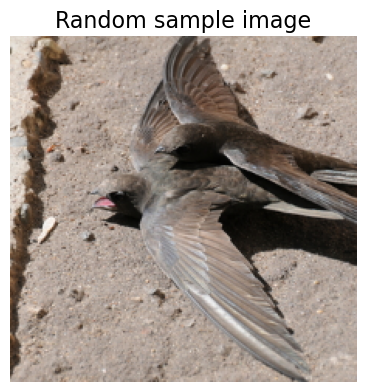

In [ ]:
fig,ax =  plt.subplots(figsize=(4.5,4.5))
ax.imshow(sample_img)
ax.set_title("Random sample image", fontsize=16)
ax.axis('off')
plt.show()

In the following sections, we will be applying all the transformations and storing the results for a final comparative plot.

### Rotations and flips:

The transformation will be performed using the torchvision package, so the image has to be converted to a torch tensor

In [ ]:
# Image normalized to [0,1] and converted to torch tensor
img_tensor = torch.tensor(sample_img/255.0).permute(2, 0, 1) # Change shape to (C,H,W)
print(f"Tensor shape: {img_tensor.shape}")

# Set random seed for reproducibility
seed = 2
torch.manual_seed(seed)

# Create a list of images and titles for later visualization
img_list = [img_tensor]
img_title = ["Original Image"]

Tensor shape: torch.Size([3, 224, 224])


In [ ]:
compose_transforms = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomRotation(degrees=85)
]) # Apply random horizontal flip, vertical flip and rotation
rotated_img_1 = compose_transforms(img_tensor) # Rotated image 1
rotated_img_2 = compose_transforms(img_tensor) # Rotated image 2

# Append transformed images to the lists
img_list.append(rotated_img_1)
img_title.append("Rotated Image 1")
img_list.append(rotated_img_2)
img_title.append("Rotated Image 2")

### Gaussian Blur:

In [ ]:
# Apply Gaussian Blur
gaussian_blur = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.15, 5))
blurred_img = gaussian_blur(img_tensor) # Blurred image

# Append blurred image to the lists
img_list.append(blurred_img)
img_title.append("Blurred Image")

### Color Jitter:

In [ ]:
# Apply Color Jitter
color_jitter = T.ColorJitter(brightness=0.3,contrast=0.2,saturation=0.15,hue=0.15)
jittered_img = color_jitter(img_tensor) # Jittered image

# Append jittered image to the lists
img_list.append(jittered_img)
img_title.append("Jittered Image")

### Gaussian Noise:

In [ ]:
# Apply Gaussian Noise
noise_transform = T2.GaussianNoise(mean=0.0, sigma=0.2)
noisy_img = noise_transform(img_tensor) # Noisy image

# Append noisy image to the lists
img_list.append(noisy_img)
img_title.append("Noisy Image")

### Plot of all transforms

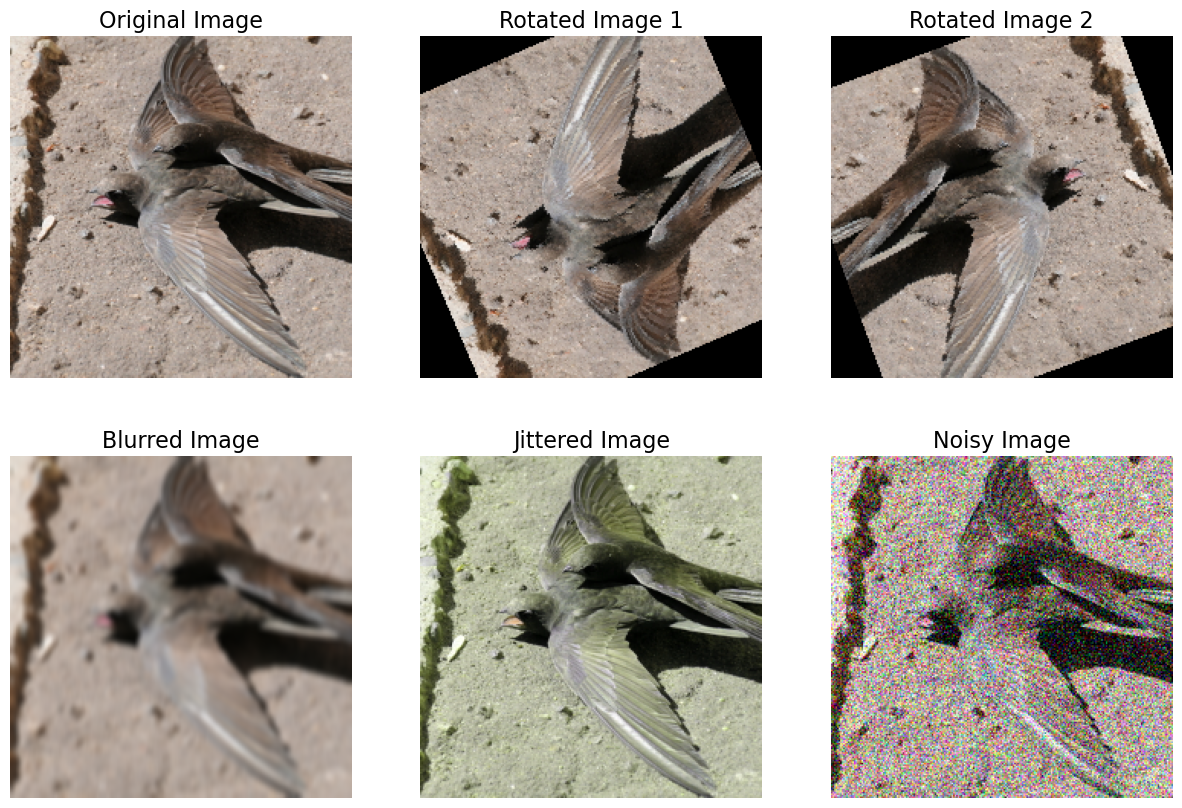

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(len(img_list)):
    ax[i//3, i%3].imshow(img_list[i].permute(1, 2, 0))
    ax[i//3, i%3].set_title(img_title[i], fontsize=16)
    ax[i//3, i%3].axis('off')

plt.show()

This concludes this notebook. You can check the *colab_notebooks/transfer_learning.ipynb* to check how the models have been trained (applying this data augmentation to the training set).

You can also check the notebook *N3_model_evaluation.ipynb* if you are interested in the model evaluation post training.